In [1]:
'''
https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification
https://scikit-learn.org/stable/supervised_learning.html
'''

'\nhttps://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification\nhttps://scikit-learn.org/stable/supervised_learning.html\n'

In [2]:
import tkinter
import matplotlib


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

#class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import PrecisionRecallDisplay

#score/results
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score

from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification

# from sklearn.metrics import plot_confusion_matrix -> Plot_Confusion_Matrix is deprecated
from sklearn.metrics import ConfusionMatrixDisplay

import tkinter
import matplotlib

import os
# os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz/bin/'
import pandas as pd
from sklearn import tree
#score
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix -> Plot_Confusion_Matrix is deprecated
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
def evaluateBinaryClassification(predictions, actuals):
    print("Predictions", predictions)
    print("Actual", actuals)
    contigency = pd.crosstab(actuals,predictions)
    print("Contigency", contigency)
    TP = contigency[1][1]
    TN = contigency[0][0]
    FP = contigency[1][0]
    FN = contigency[0][1]
    n = contigency.sum().sum()

    Acuracy = (TP + TN)/n
    Recall = TP/(TP+FN)
    Precision = TP/(TP+FP)
    FScore = 2*Recall*Precision/(Recall+Precision)
    
    return Acuracy, Recall, Precision, FScore

#Read data

In [4]:
# Read data with a different encoding (Due to the presence of special characters)
df_agg = pd.read_csv('HMAGLOFDB.csv', encoding='latin1')
df_agg.head()

,GF_ID,Year_approx,Year_exact,Month,Day,Lake_name,Glacier_name,GL_ID,LakeDB_ID,G_ID,...,Commerical_damaged,Infra,Agricultural,Hydropower,Econ_damage,Sat_evidence,Ref_scientific,Ref_scientific_full,Ref_other,Remarks
0,1,1533.0,1533.0,NaN,NaN,NaN,Chong Kumden,Ephemeral,NaN,G077657E35156N,...,NaN,NaN,NaN,NaN,NaN,NaN,"(Hedin, 1917; Hewitt, 2014; Bazai et al., 2021)","Hedin, S., 1917. Southern Tibet. Stockholm; 34...",NaN,NaN
1,2,1560.0,1560.0,NaN,NaN,NaN,Machhapuchhre,No lake,NaN,G084009E28557N,...,NaN,NaN,NaN,NaN,NaN,NaN,"(Ives, Shrestha and Mool, 2010; ICIMOD, 2011)","Ives, J.D., Shrestha, R.B., Mool, P.K., 2010. ...",NaN,NaN
2,3,1661.0,1661.0,NaN,NaN,NaN,Biafo,GL075907E35687N,"2, 4",G075593E36006N,...,NaN,Entire village destroyed,NaN,NaN,NaN,NaN,"(Godwin-Austen, 1864)","Godwin-Austen, H.H., 1864. On the Glaciers of ...",NaN,NaN
3,4,1780.0,1780.0,NaN,NaN,NaN,Chong Kumden,Ephemeral,NaN,G077657E35156N,...,NaN,NaN,NaN,NaN,NaN,NaN,"(Strachey, 1853; Bazai et al., 2021)","Strachey, W., 1853. Physical Geography of West...",NaN,Strachey (1853) reported that the oldest flood...
4,6,1833.0,1833.0,NaN,NaN,NaN,Chong Kumden,Ephemeral,NaN,G077657E35156N,...,NaN,NaN,NaN,NaN,NaN,NaN,"(Hewitt and Liu, 2010; Hewitt, 2014; Bazai et ...","Hewitt, K., Liu, J., 2010. Ice-Dammed Lakes an...",NaN,NaN


In [5]:
print(df_agg.columns)

Index(['GF_ID', 'Year_approx', 'Year_exact', 'Month', 'Day', 'Lake_name',
       'Glacier_name', 'GL_ID', 'LakeDB_ID', 'G_ID', 'Lat_lake', 'Lon_lake',
       'Elev_lake', 'Lat_impact', 'Lon_impact', 'Elev_impact', 'Impact_type',
       'Lake_type', 'Transboundary', 'Repeat', 'Region_RGI', 'Region_HiMAP',
       'Country', 'Province', 'River_Basin', 'Driver_lake', 'Driver_GLOF',
       'Mechanism', 'Area', 'Volume', 'Discharge_water', 'Discharge_solid',
       'Impact', 'Lives_total', 'Lives_male', 'Lives_female',
       'Lives_disabilities', 'Injured_total', 'Injured_male', 'Injured_female',
       'Injured_disabilities', 'Displaced_total', 'Displaced_male',
       'Displaced_female', 'Displaced_disabilities', 'Livestock',
       'Residential_destroyed', 'Commerical_destroyed', 'Residential_damaged',
       'Commerical_damaged', 'Infra', 'Agricultural', 'Hydropower',
       'Econ_damage', 'Sat_evidence', 'Ref_scientific', 'Ref_scientific_full',
       'Ref_other', 'Remarks'],
      dty

In [6]:
"""
Data Preprocessing
"""
# Dropping the columns Year_exact, Month, Day
columns_to_drop = ['GF_ID','Year_exact', 'Month', 'Day', 'Lives_male', 'LakeDB_ID', 'G_ID',
'Lives_female', 'Lives_disabilities', 'Injured_total', 'Injured_male', 'Injured_female', 'Injured_disabilities', 'Displaced_total', 'Displaced_male', 'Displaced_female',
'Displaced_disabilities', 'Livestock', 'Residential_destroyed', 'Commerical_destroyed', 'Residential_damaged', 'Commerical_damaged', 'Infra', 'Agricultural', 'Hydropower', 
'Sat_evidence', 'Ref_scientific', 'Ref_scientific_full', 'Ref_other', 'Remarks', 'Region_RGI', 'Region_HiMAP']

# Drop the specified columns
df_agg.drop(columns=columns_to_drop, inplace=True)
print(df_agg.head())

"""
Additional Columns that can be dropped
GL_ID', 'LakeDB_ID
Region_RGI
Region_HiMAP
Lives_total
Econ_damage
"""

   Year_approx Lake_name   Glacier_name            GL_ID  Lat_lake  Lon_lake  \
0       1533.0       NaN   Chong Kumden        Ephemeral    35.172    77.702   
1       1560.0       NaN  Machhapuchhre          No lake    28.520    83.992   
2       1661.0       NaN          Biafo  GL075907E35687N    35.687    75.907   
3       1780.0       NaN   Chong Kumden        Ephemeral    35.172    77.702   
4       1833.0       NaN   Chong Kumden        Ephemeral    35.172    77.702   

   Elev_lake  Lat_impact  Lon_impact  Elev_impact  ...      Driver_lake  \
0     4691.0         NaN         NaN          NaN  ...  Surging glacier   
1     3741.0         NaN         NaN          NaN  ...              NaN   
2     3059.0         NaN         NaN          NaN  ...  Glacier advance   
3     4691.0         NaN         NaN          NaN  ...  Surging glacier   
4     4691.0         NaN         NaN          NaN  ...  Surging glacier   

  Driver_GLOF Mechanism Area Volume Discharge_water Discharge_solid 

"\nAdditional Columns that can be dropped\nGL_ID', 'LakeDB_ID\nRegion_RGI\nRegion_HiMAP\nLives_total\nEcon_damage\n"

In [7]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_approx      555 non-null    float64
 1   Lake_name        312 non-null    object 
 2   Glacier_name     410 non-null    object 
 3   GL_ID            572 non-null    object 
 4   Lat_lake         703 non-null    float64
 5   Lon_lake         703 non-null    float64
 6   Elev_lake        696 non-null    float64
 7   Lat_impact       462 non-null    float64
 8   Lon_impact       462 non-null    float64
 9   Elev_impact      462 non-null    float64
 10  Impact_type      462 non-null    object 
 11  Lake_type        673 non-null    object 
 12  Transboundary    703 non-null    object 
 13  Repeat           703 non-null    object 
 14  Country          703 non-null    object 
 15  Province         487 non-null    object 
 16  River_Basin      657 non-null    object 
 17  Driver_lake     

In [8]:
"""
# Remove the column: But this is an extreme case and should only be used when there are many null values in the column.
# Columns to keep
columns_to_keep = ['Year_approx', 'Lake_type', 'Lat_lake', 'Lon_lake', 'Elev_lake', 'Lake_name', 'Glacier_name', 'Impact_type', 
                   'Transboundary', 'Driver_lake', 'Driver_GLOF', 'Mechanism', 'Area', 'Volume', 'Impact', 
                   'Econ_damage']

# Drop all columns except the ones in columns_to_keep
df_cleaned = df_agg.drop(columns=df_agg.columns.difference(columns_to_keep), inplace=False)

# Now df_cleaned contains only the specified columns
df_cleaned.head()

"""
df_cleaned = df_agg

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_approx      555 non-null    float64
 1   Lake_name        312 non-null    object 
 2   Glacier_name     410 non-null    object 
 3   GL_ID            572 non-null    object 
 4   Lat_lake         703 non-null    float64
 5   Lon_lake         703 non-null    float64
 6   Elev_lake        696 non-null    float64
 7   Lat_impact       462 non-null    float64
 8   Lon_impact       462 non-null    float64
 9   Elev_impact      462 non-null    float64
 10  Impact_type      462 non-null    object 
 11  Lake_type        673 non-null    object 
 12  Transboundary    703 non-null    object 
 13  Repeat           703 non-null    object 
 14  Country          703 non-null    object 
 15  Province         487 non-null    object 
 16  River_Basin      657 non-null    object 
 17  Driver_lake     

Year Approx

In [10]:
# Convert the column from string to numeric, leaving NA values unchanged
df_agg['Year_approx'] = pd.to_numeric(df_agg['Year_approx'], errors='coerce')

# Group by 'Country' and calculate the mean year of occurrence
mean_year_by_country = df_agg.groupby('Country')['Year_approx'].mean()

# Iterate over each country and fill missing values with the mean year
for country, mean_year in mean_year_by_country.items():
    # Filter rows for the current country
    country_rows = df_agg[df_agg['Country'] == country]
    
    # Fill missing values with the mean year for the current country
    df_agg.loc[country_rows.index, 'Year_approx'] = country_rows['Year_approx'].fillna(mean_year)


column_name = "Year_approx"

# Count the number of NULL values in the specified column
null_count = df_agg[column_name].isnull().sum()

# Print the number of NULL values
print(f"Number of NULL values in '{column_name}': {null_count}")


Number of NULL values in 'Year_approx': 0


Lake_name

In [11]:
""" 
Filling Using
"Glacier_name": If the lake is associated with a glacier, you can use the name of the glacier to infer the name of the lake.
"Country": If the lake is located in a specific country, you might have information about common lake names in that country, which we can use to fill in the missing values.
"""

# Fill NA values in 'Lake_name' based on 'Glacier_name' and 'Country'
df_agg['Lake_name'] = df_agg.apply(
    lambda row: row['Glacier_name'] if pd.isna(row['Lake_name']) else row['Lake_name'], axis=1)

df_agg['Lake_name'] = df_agg.apply(
    lambda row: f"Unnamed Lake in {row['Country']}" if pd.isna(row['Lake_name']) else row['Lake_name'], axis=1)

# Check if NA values are filled
print("No.of NULL values in Lake_name",df_agg['Lake_name'].isnull().sum())  # Should print 0 if all NA values are filled


No.of NULL values in Lake_name 0


Glacier_name

In [12]:
df_agg['Glacier_name'] = df_agg.apply(
    lambda row: f"Unnamed Glacier in {row['Country']}" if pd.isna(row['Glacier_name']) else row['Glacier_name'], axis=1)

# Check if NA values are filled
print("No.of NULL values in Glacial_name",df_agg['Lake_name'].isnull().sum())  # Should print 0 if all NA values are filled


No.of NULL values in Glacial_name 0


GL_ID

In [13]:
# Group by 'Country' and calculate mode category of 'GL_ID'
mode_gl_id_by_country = df_agg.groupby('Country')['GL_ID'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Fill missing 'GL_ID' values based on mode category of corresponding country
for country, mode_gl_id in mode_gl_id_by_country.items():
    df_agg.loc[df_agg['Country'] == country, 'GL_ID'] = df_agg.loc[df_agg['Country'] == country, 'GL_ID'].fillna(mode_gl_id)

# Check if NA values are filled
print("No.of NULL values in GL_ID",df_agg['GL_ID'].isnull().sum())  # Should print 0 if all NA values are filled

No.of NULL values in GL_ID 0


In [14]:
"""
# Convert the whole dataframe as a string and display
display(df_agg.to_string())

# saving the dataframe
df_agg.to_csv('Transformed.csv')
"""

"\n# Convert the whole dataframe as a string and display\ndisplay(df_agg.to_string())\n\n# saving the dataframe\ndf_agg.to_csv('Transformed.csv')\n"

Lake_type: The type of lake (e.g., moraine dammed, ice dammed) can provide insights into the stability and potential for sudden drainage of the lake, which are critical factors in GLOF occurrence.

In [15]:
# Handling missing values of the lake type: By filling it with mode
unique_Lake_type = df_agg['Lake_type'].unique()
# Print the unique elements
print("Unique elements(Before): ", unique_Lake_type)

# Calculate the mode of the 'Lake_type' column
mode_value = df_agg['Lake_type'].mode()[0]
# Fill NaN values with the mode value
df_agg['Lake_type'] = df_agg['Lake_type'].fillna(mode_value)

unique_Lake_type = df_agg['Lake_type'].unique()
print("Unique elements(After):", unique_Lake_type)



Unique elements(Before):  ['Ice dammed' 'Supraglacial' nan 'Moraine dammed' 'Water pocket'
 'Landslide dammed' 'Bedrock']
Unique elements(After): ['Ice dammed' 'Supraglacial' 'Moraine dammed' 'Water pocket'
 'Landslide dammed' 'Bedrock']


Lat_lake, Lon_lake: The geographical coordinates of the lake can help identify its location within the high mountain region, which is crucial for understanding the context and potential risks associated with GLOF events.

In [16]:
# Handling missing values of the Lat_lake & Lon_lake by finding the average of the coordinates specific to that country

# Now, missing latitude and longitude values are not filled with the average coordinates for each country
print("Null Values(Before): Lat_lake",df_agg['Lat_lake'].isnull().sum(), "Lon_lake",df_agg['Lon_lake'].isnull().sum())

# Group the DataFrame by 'Country' and calculate average coordinates
country_avg_coords = df_agg.groupby('Country')[['Lat_lake', 'Lon_lake']].mean()

# Iterate over each group and fill missing values with the corresponding average coordinates
for country, avg_coords in country_avg_coords.iterrows():
    # Get average coordinates for the current country
    avg_lat = avg_coords['Lat_lake']
    avg_lon = avg_coords['Lon_lake']
    
    # Filter rows for the current country
    country_rows = df_agg[df_agg['Country'] == country]
    
    # Fill missing latitude and longitude values with the corresponding average coordinates
    df_agg.loc[country_rows.index, 'Lat_lake'] = country_rows['Lat_lake'].fillna(avg_lat)
    df_agg.loc[country_rows.index, 'Lon_lake'] = country_rows['Lon_lake'].fillna(avg_lon)

# Now, missing latitude and longitude values are filled with the average coordinates for each country
print("Null Values(After): Lat_lake",df_agg['Lat_lake'].isnull().sum(), "Lon_lake",df_agg['Lon_lake'].isnull().sum())


Null Values(Before): Lat_lake 0 Lon_lake 0
Null Values(After): Lat_lake 0 Lon_lake 0


Elev_lake: The elevation of the lake is important as higher elevation lakes may have different characteristics and risks compared to lower elevation ones. Higher elevation lakes might be more prone to rapid melting and sudden drainage events.

In [17]:

# Now, missing elevation values are not filled with the average coordinates for each country
print("Null Values(Before): Elev_lake",df_agg['Elev_lake'].isnull().sum())

"""
# Group the DataFrame by 'Glacier_name' and calculate average elevation for each glacier
glacier_avg_elev = df_agg.groupby('Glacier_name')[['Elev_lake']].mean()

# Iterate over each glacier and fill missing elevation values
for glacier, avg_elev in glacier_avg_elev.iterrows():
    # Filter rows for the current glacier
    glacier_rows = df_agg[df_agg['Glacier_name'] == glacier]
    
    # Fill missing elevation values with the average elevation for the current glacier
    df_agg.loc[glacier_rows.index, 'Elev_lake'] = glacier_rows['Elev_lake'].fillna(avg_elev)

# Now, missing elevation values are not filled with the average coordinates for each country
print("Null Values(In Between): Elev_lake",df_agg['Elev_lake'].isnull().sum())

# Group the DataFrame by 'Country' and calculate average elevation for each country
country_avg_elev = df_agg.groupby('Country')[['Elev_lake']].mean()

# Iterate over each country and fill missing elevation values
for country, avg_elev in country_avg_elev.iterrows():
    # Filter rows for the current country
    country_rows = df_agg[df_agg['Country'] == country]
    
    # Fill missing elevation values with the average elevation for the current country
    df_agg.loc[country_rows.index, 'Elev_lake'] = country_rows['Elev_lake'].fillna(avg_elev)
"""

""" 
# Group the DataFrame by 'Glacier_name' and calculate average elevation for each glacier
glacier_avg_elevation = df_agg.groupby('Glacier_name')['Elev_lake'].mean()

# Group the DataFrame by 'Country' and calculate average elevation for each country
country_avg_elevation = df_agg.groupby('Country')['Elev_lake'].mean()

# Iterate over each row and fill missing elevation values
for index, row in df_agg.iterrows():
    if pd.isna(row['Elev_lake']):  # Check if elevation value is missing
        if pd.notna(row['Glacier_name']):  # Check if Glacier_name is available
            # Fill missing elevation with average elevation for the corresponding glacier
            df_agg.at[index, 'Elev_lake'] = glacier_avg_elevation[row['Glacier_name']]
        else:
            # Fill missing elevation with average elevation for the corresponding country
            df_agg.at[index, 'Elev_lake'] = country_avg_elevation[row['Country']]

# Now, missing elevation values are filled with the average elevations for each specific glacier or country
"""

# Group the DataFrame by 'Country' and calculate average coordinates
country_avg_elevation = df_agg.groupby('Country')[['Elev_lake']].mean()

# Iterate over each group and fill missing values with the corresponding average coordinates
for country, avg_elev in country_avg_elevation.iterrows():
    # Get average elevation for the current country
    avg_elevation = avg_elev['Elev_lake']
    
    # Filter rows for the current country
    country_rows = df_agg[df_agg['Country'] == country]
    
    # Fill missing latitude and longitude values with the corresponding average coordinates
    df_agg.loc[country_rows.index, 'Elev_lake'] = country_rows['Elev_lake'].fillna(avg_elevation)

# Now, missing elevation values are filled with the average elevations for each specific glacier or country
print("Null Values(After): Elev_lake",df_agg['Elev_lake'].isnull().sum())

Null Values(Before): Elev_lake 7
Null Values(After): Elev_lake 0


In [18]:
""" 
Lat_impact, Lon_impact, Elev_impact
"""
# Group the DataFrame by 'Glacier_name' and calculate average latitude, longitude, and elevation for each glacier
glacier_avg = df_agg.groupby('Glacier_name')[['Lat_impact', 'Lon_impact', 'Elev_impact']].mean()

# Iterate over each glacier and fill missing values with corresponding averages
for glacier, avg_values in glacier_avg.iterrows():
    glacier_rows = df_agg[df_agg['Glacier_name'] == glacier]
    df_agg.loc[glacier_rows.index, 'Lat_impact'] = glacier_rows['Lat_impact'].fillna(avg_values['Lat_impact'])
    df_agg.loc[glacier_rows.index, 'Lon_impact'] = glacier_rows['Lon_impact'].fillna(avg_values['Lon_impact'])
    df_agg.loc[glacier_rows.index, 'Elev_impact'] = glacier_rows['Elev_impact'].fillna(avg_values['Elev_impact'])

# For glaciers with missing names, group the DataFrame by 'Country' and calculate average latitude, longitude, and elevation
country_avg = df_agg.groupby('Country')[['Lat_impact', 'Lon_impact', 'Elev_impact']].mean()

# Iterate over each country and fill missing values with corresponding averages
for country, avg_values in country_avg.iterrows():
    country_rows = df_agg[df_agg['Country'] == country]
    df_agg.loc[country_rows.index, 'Lat_impact'] = country_rows['Lat_impact'].fillna(avg_values['Lat_impact'])
    df_agg.loc[country_rows.index, 'Lon_impact'] = country_rows['Lon_impact'].fillna(avg_values['Lon_impact'])
    df_agg.loc[country_rows.index, 'Elev_impact'] = country_rows['Elev_impact'].fillna(avg_values['Elev_impact'])

print("Null Values(After): Lat_impact",df_agg['Lat_impact'].isnull().sum())
print("Null Values(After): Lon_impact",df_agg['Lon_impact'].isnull().sum())
print("Null Values(After): Elev_impact",df_agg['Elev_impact'].isnull().sum())

Null Values(After): Lat_impact 0
Null Values(After): Lon_impact 0
Null Values(After): Elev_impact 0


Impact_type: Understanding the quality of impact records (e.g., 'Observation' or 'Deposit') can help assess the severity and extent of past GLOF events, which in turn can inform predictions about future occurrences.

In [19]:
# Most of the values in Impact_type are Unknown/NA: So its better to remove the column
df_agg = df_agg.drop('Impact_type', axis=1)


Province

In [20]:



# Handling missing values of the Province: By filling it with mode specific to that country
unique_Province = df_agg['Province'].unique()
# Print the unique elements
print("Unique elements(Before): ", unique_Province)

# Check if NA values are filled
print("No.of NULL values in Province",df_agg['Province'].isnull().sum())  # Should print 0 if all NA values are filled

# # Replace NaN values with "NA" in the 'Province' column
# df_agg['Province'] = df_agg['Province'].fillna("NA")

# # Define a function to fill missing values with mode if mode exists, otherwise fill with "Unknown"
# def fill_with_mode_or_unknown(x):
#     mode_values = x.mode()
#     if not mode_values.empty:
#         return x.fillna(mode_values[0])
#     else:
#         return x.fillna("Unknown")

# # Group by 'Country' and fill missing 'Province' values with the mode of 'Province' within each country
# df_agg['Province'] = df_agg.groupby('Country')['Province'].transform(fill_with_mode_or_unknown)


# Fill NA values in 'Province' based on 'Glacier_name' and 'Country'
df_agg['Province'] = df_agg.apply(
    lambda row: row['Country'] if pd.isna(row['Province']) else row['Province'], axis=1)

# Check if NA values are filled
print("No.of NULL values in Province",df_agg['Province'].isnull().sum())  # Should print 0 if all NA values are filled

unique_Province = df_agg['Province'].unique()
# Print the unique elements
print("Unique elements(After): ", unique_Province)


Unique elements(Before):  ['Ladakh' 'Gandaki' 'Gilgit - Baltistan' nan 'Xinjiang' 'Koshi' 'TAR'
 'Almaty' 'Punakha' 'Kashmir' 'Himachal Pradesh' 'Bagmati' 'Sikkim'
 'Bumthang' 'Gorno-Badakhshan' 'Karnali' 'Khyber Pakhtunkhwa' 'Chitral'
 'Badakhshan' 'Uttarakhand' 'Province No. 1' 'Panjshir' 'Sichuan'
 'Wangduephodrang' 'Kunar' 'Thimphu' 'Arunachal Pradesh']
No.of NULL values in Province 216
No.of NULL values in Province 0
Unique elements(After):  ['Ladakh' 'Gandaki' 'Gilgit - Baltistan' 'Kyrgyzstan' 'Xinjiang'
 'Tajikistan' 'Koshi' 'TAR' 'Almaty' 'Punakha' 'Kazakhstan' 'Kashmir'
 'Himachal Pradesh' 'China' 'Bagmati' 'Sikkim' 'Bumthang'
 'Gorno-Badakhshan' 'Karnali' 'Khyber Pakhtunkhwa' 'Chitral' 'Badakhshan'
 'Uttarakhand' 'Province No. 1' 'Panjshir' 'Sichuan' 'Wangduephodrang'
 'Kunar' 'Thimphu' 'Arunachal Pradesh']


River basin

In [21]:
# Handling missing values of the Province: By filling it with mode specific to that country
River_Basin = df_agg['River_Basin'].unique()
# Print the unique elements
print("Unique elements(Before): ", River_Basin)

# Check if NA values are filled
print("No.of NULL values in River_Basin",df_agg['River_Basin'].isnull().sum())  # Should print 0 if all NA values are filled

# Fill NA values in 'River_Basin' based on 'Glacier_name' and 'Country'
df_agg['River_Basin'] = df_agg.apply(
    lambda row: row['Country'] if pd.isna(row['River_Basin']) else row['River_Basin'], axis=1)

# Check if NA values are filled
print("No.of NULL values in Province",df_agg['River_Basin'].isnull().sum())  # Should print 0 if all NA values are filled

unique_Province = df_agg['River_Basin'].unique()
# Print the unique elements
print("Unique elements(After): ", unique_Province)

Unique elements(Before):  ['Shyok' 'Seti' 'Braldu' 'Hunza' 'Gilgit' 'Alamedin' 'Indus' 'Shigar'
 'Ala Archa' 'Yarkant' 'Bagrot' 'Inylchek' 'Vanch' 'Tamor' 'Shaksgam'
 'Parlung Zangbo' 'Poiqu' 'Amo Chhu' 'Nian Chu' 'Kishi Almaty' 'Bomi'
 'Yalong Tsangpo' nan 'Pho Chhu ' 'Izzyk' 'Gyirong' 'Pumqu'
 'Gongbujiangda/Tangbulang (Nyang) ' 'Nyang' 'Leviy Talgar' 'Kangbuqu'
 'Suo/Xibaxiaqu ' 'Nujiang' 'Kishi Almatinka' 'Srednii Talgar' 'Tong'
 'Nubra' 'Kumbelisu' 'Dudh Koshi' 'Middle Talgar' 'Kaskelen'
 'Luozha Zhangmu' 'Baspa' 'Tanymas' 'Sarykan' 'Shilik' 'Upper Mustang'
 'Hushe' 'Tama Koshi' 'Rongxia' 'Maquan' 'Changme' 'Chamkhar Chhu'
 'Alauddin' 'Shakhdara' 'Nyalam' 'Luozhaxiongqu' 'Humla' 'Chitral'
 'Yarlung Tsangpo' 'Zymdan' 'Cona' 'Bianba' 'Upper Indus' 'Yasin'
 'Sanglich' 'Alaknanda' 'Kargaly' 'Mo Chhu ' 'Arkary' 'Nooruz' 'Arun'
 'Panjshir' 'Ishkoman' 'Yangtze' 'Toguzbulak' 'Chitral ' 'Yigong Zangbo'
 'Ghizer' 'Melamchi' 'Teesta' 'Mangde Chhu' 'Pyanj' 'Shugnan' 'Kunar'
 'Syn Tash' 'Zansk

In [22]:
"""   
Most of the data cells in the column are empty but this feature is important so, adam optimizer can handle the sparse values
"""
# Assuming df_agg is your DataFrame
df_agg['Driver_lake'] = df_agg['Driver_lake'].fillna("Missing")
df_agg['Driver_GLOF'] = df_agg['Driver_GLOF'].fillna("Missing")
df_agg['Mechanism'] = df_agg['Mechanism'].fillna("Missing")

In [23]:
"""
20  Area             34 non-null     float64
21  Volume           105 non-null    object 
22  Discharge_water  72 non-null     float64
23  Discharge_solid  19 non-null     float64
24  Impact           24 non-null     object 
25  Lives_total      30 non-null     object 
26  Econ_damage      14 non-null     float64

Removing these columns as most of the data is NULL
"""
columns_to_drop = ['Area', 'Volume', 'Discharge_water', 'Discharge_solid', 'Impact', 'Lives_total', 'Econ_damage']
df_agg = df_agg.drop(columns=columns_to_drop, axis=1)


# Mapping dictionary
truth_map = {'Y': 1, 'N': 0}

# Apply mapping to convert 'Transboundary' column values
df_agg['Transboundary'] = df_agg['Transboundary'].map(truth_map)
df_agg['Repeat'] = df_agg['Repeat'].map(truth_map)


In [24]:
column_name = 'Repeat'

# Get a list of column names excluding the one you want to move
other_columns = [col for col in df_agg.columns if col != column_name]

# Reorder the DataFrame with the desired column at the end
df_agg = df_agg[other_columns + [column_name]]

# saving the dataframe
df_agg.to_csv('Transformed.csv')

Transboundary: Information about whether the impact of the GLOF is potentially transboundary can help in assessing broader risks and coordinating mitigation efforts across borders.

***Feature Selection***

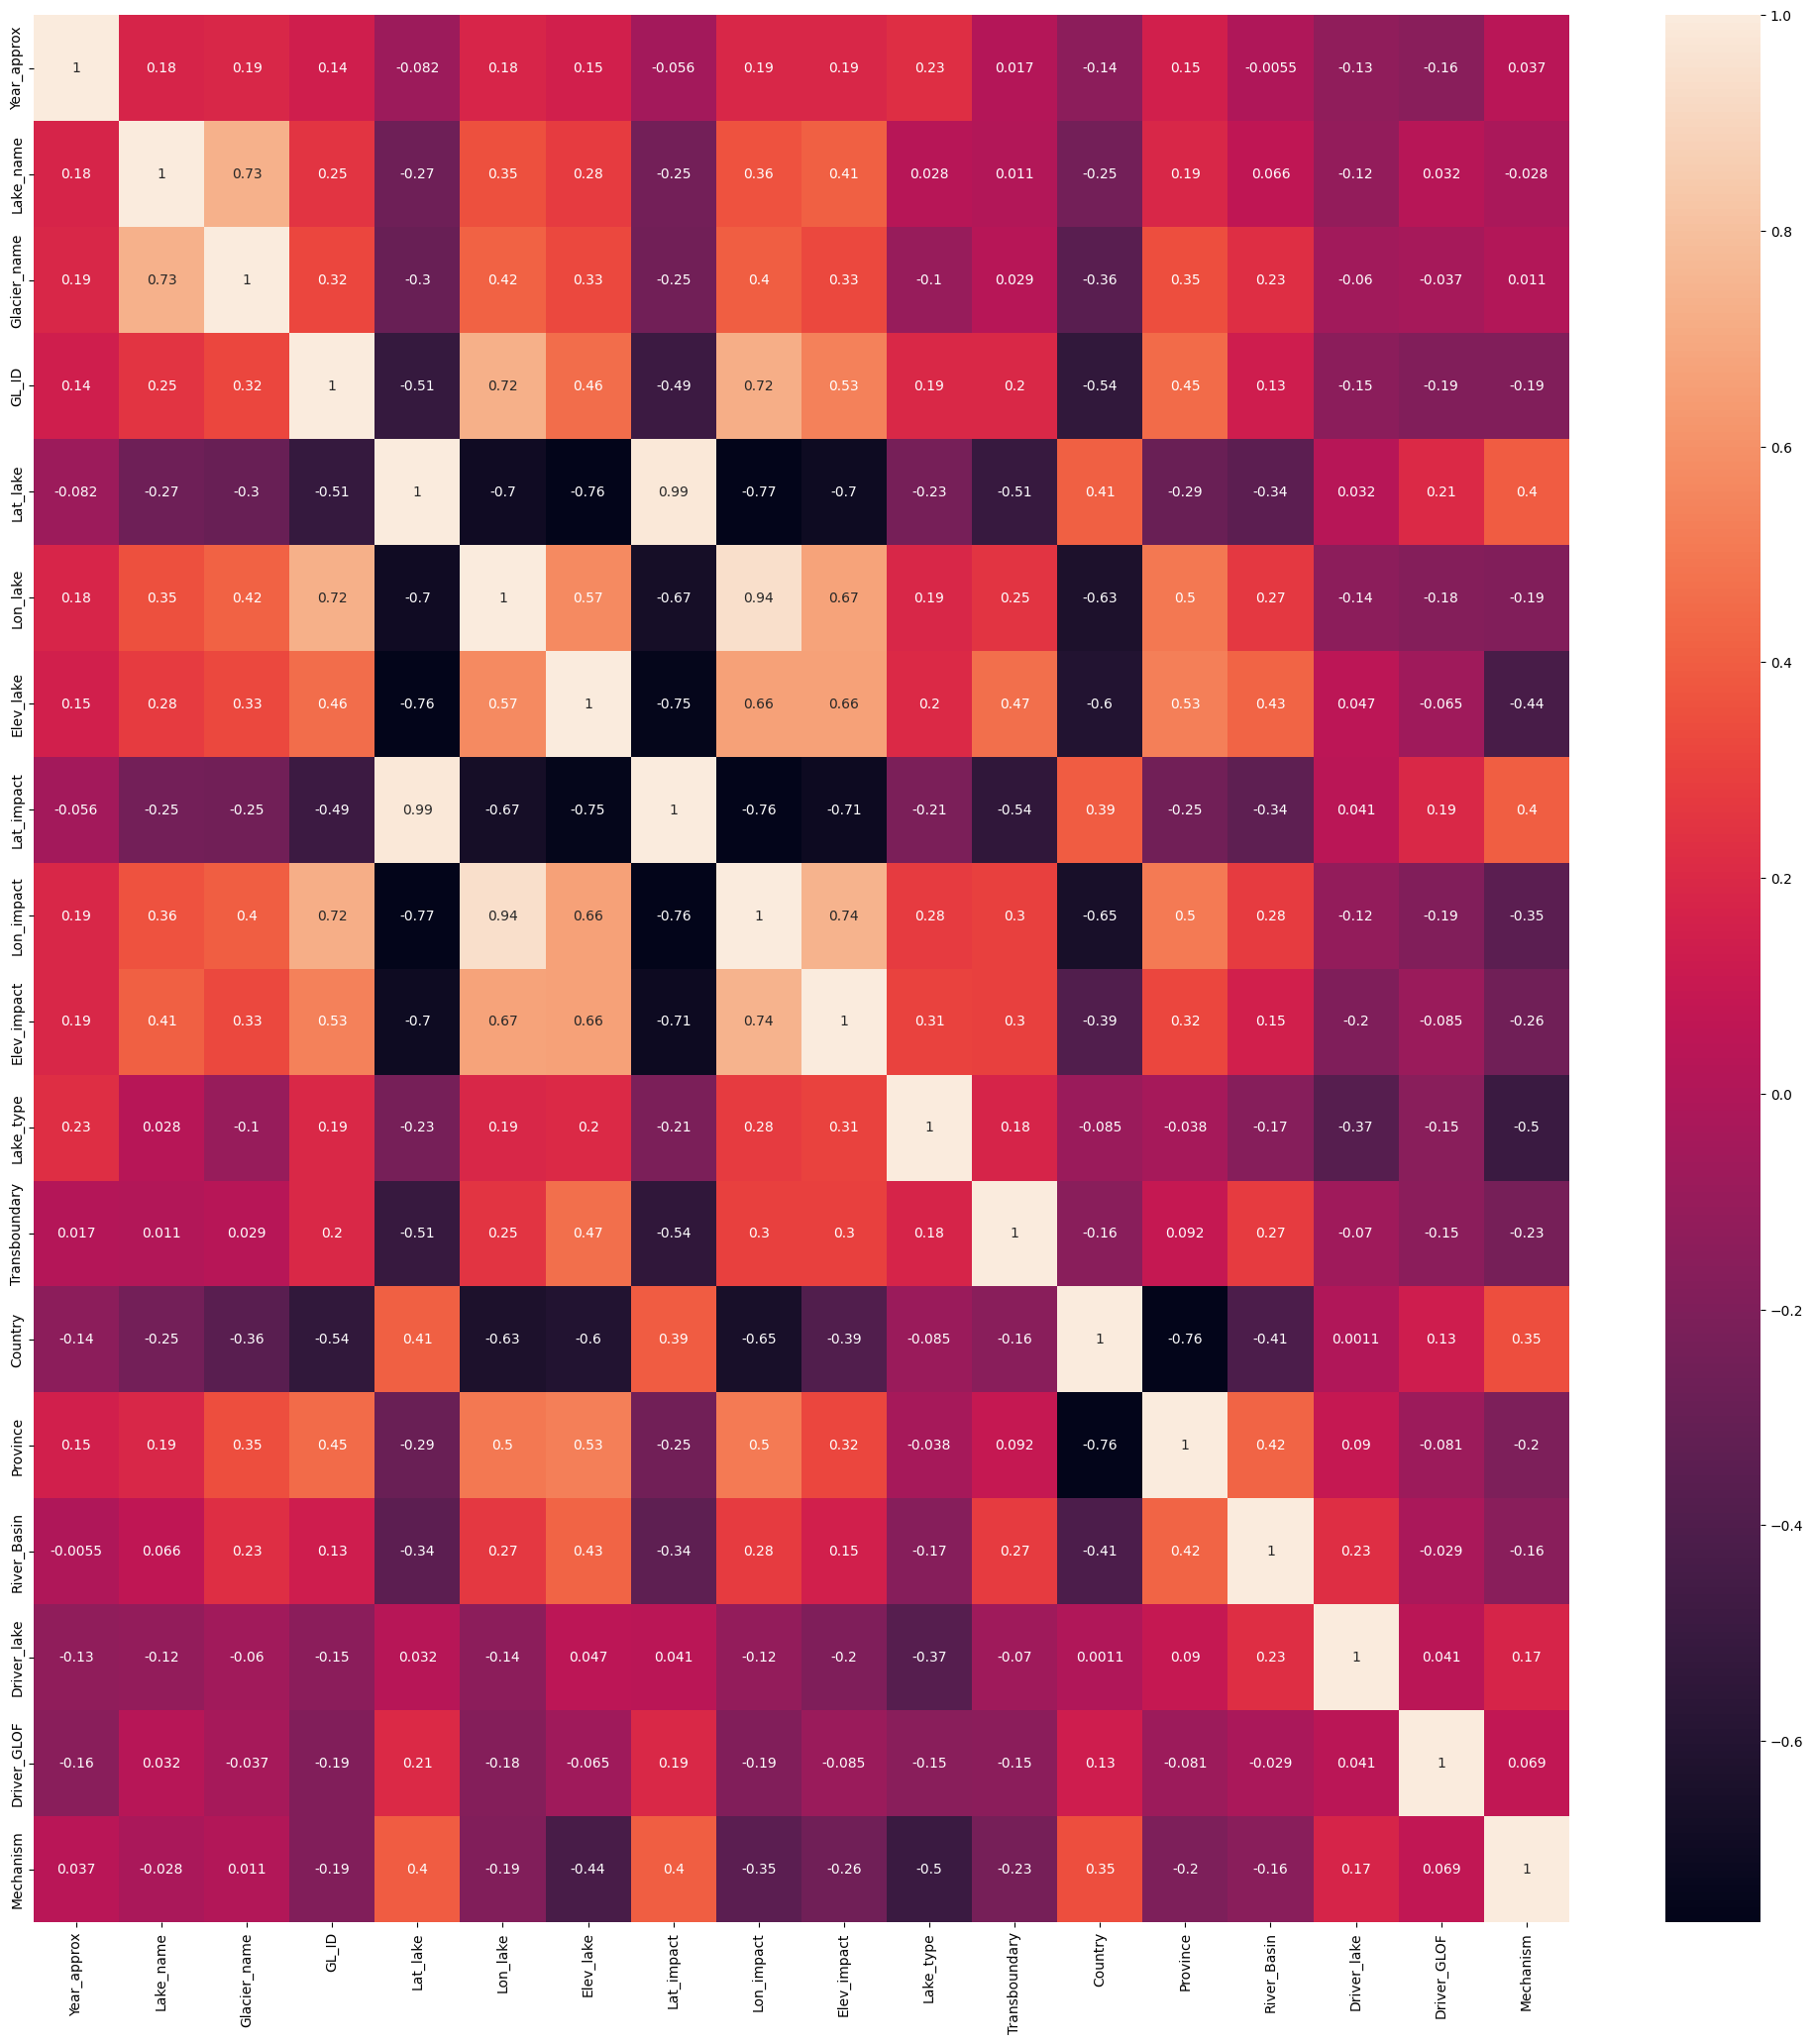

In [25]:
"""  
The logic behind using correlation for feature selection is that good variables correlate highly with the target. 
If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, 
the model only needs one, as the second does not add additional information. 
"""
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Assuming cat_cols is a list of column names containing categorical variables
cat_cols = ['Lake_name', 'Glacier_name', 'GL_ID', 'Lake_type', 'Country', 'Province', 'River_Basin', 'Driver_lake', 'Driver_GLOF', 'Mechanism']

# Encode categorical columns
for col in cat_cols:
    df_agg[col] = label_encoder.fit_transform(df_agg[col].astype(str))

# Normalize using Min/Max Normalization.
df_agg=(df_agg-df_agg.min())/(df_agg.max()-df_agg.min())

# Calculate the correlation matrix excluding the 'Repeat' column
corr_encoded = df_agg.drop(columns=['Repeat']).corr()

# Plotting the heat map
plt.figure(figsize=(25, 25))
sns.heatmap(corr_encoded, annot=True)
plt.show()



In [26]:
# Drop the 'Repeat' column to get the features (X)
X = df_agg.drop(columns=['Repeat'], axis=1)
X = X.values

# 'Repeat' column is your target variable (Y)
y = df_agg['Repeat'].values

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [27]:
""" 
PCA (Principal Component Analysis) is not a feature selection mechanism, 
as it does not select features based on their relevance to the target variable. 
Instead, PCA is a dimensionality reduction technique that transforms a set of correlated 
variables into a smaller set of uncorrelated variables, called principal components (PCs)
"""

from sklearn.decomposition import PCA
pca = PCA()
columns_to_use = len(X_train[1])
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

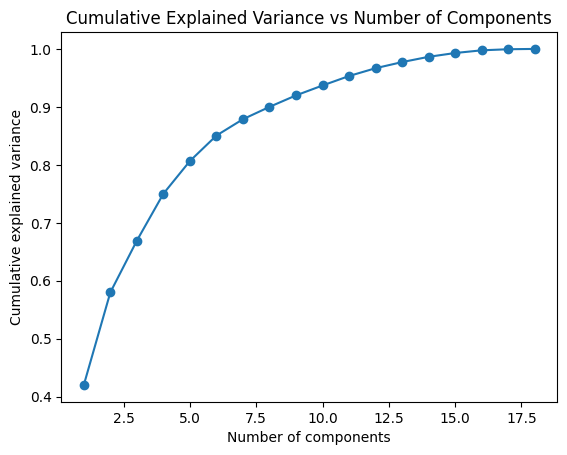

In [28]:
# Plot the cumulative explained variance vs the number of components
plt.plot(range(1, columns_to_use + 1), cumsum, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.show()

In [29]:
d = np.argmax(cumsum >= 0.95) + 1
"""  
The optimal number of principal components is reached when the cumulative variance stops growing fast:
We found that the number of dimensions can be reduced from 35 to 13 while preserving 95% of its variance. 
Hence, the compressed dataset is now 37% of its original size!
"""
# Create a PCA object with the desired number of components
print("Optimal No. of Components", d)
pca = PCA(n_components=d)

# Fit the PCA object to the training data
pca.fit(X_train)

# Transform the training and testing data using the PCA object
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


Optimal No. of Components 11


In [30]:
"""
However, PCA may not perform optimally if categorical variables are label encoded, especially if there is no inherent order or magnitude among the categories.

Here are a few considerations regarding PCA and label-encoded categorical variables:

Impact of Label Encoding: Label encoding may introduce artificial ordering or magnitude where none exists, potentially leading PCA to give undue importance to encoded values. This can distort the interpretation of principal components and affect the performance of downstream analysis.

Dimensionality: Label encoding increases the dimensionality of the dataset, which can affect the performance of PCA, especially if the categorical variables have many unique categories. High dimensionality can lead to increased computational complexity and may require more principal components to capture the variance adequately.

Encoding Method: PCA may perform better if categorical variables are encoded using methods that do not introduce artificial ordering, such as one-hot encoding or target encoding. These encoding techniques preserve the categorical nature of variables without imposing a linear relationship between categories.

Data Interpretation: After PCA, it's essential to interpret the principal components correctly. If label encoding is used, the interpretation of principal components may be challenging, as the numerical values may not correspond to meaningful differences between categories.

Alternative Approaches: Depending on the specific dataset and objectives, alternative dimensionality reduction techniques or encoding methods may be more appropriate. For example, for categorical variables with high cardinality, techniques like target encoding or embedding methods (e.g., for text data) may be more suitable.
"""

"\nHowever, PCA may not perform optimally if categorical variables are label encoded, especially if there is no inherent order or magnitude among the categories.\n\nHere are a few considerations regarding PCA and label-encoded categorical variables:\n\nImpact of Label Encoding: Label encoding may introduce artificial ordering or magnitude where none exists, potentially leading PCA to give undue importance to encoded values. This can distort the interpretation of principal components and affect the performance of downstream analysis.\n\nDimensionality: Label encoding increases the dimensionality of the dataset, which can affect the performance of PCA, especially if the categorical variables have many unique categories. High dimensionality can lead to increased computational complexity and may require more principal components to capture the variance adequately.\n\nEncoding Method: PCA may perform better if categorical variables are encoded using methods that do not introduce artificial 

In [31]:
print(X_train.shape)
print(y_train.shape)


(562, 18)
(562,)


In [32]:

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


Confusion Matrix:
 [[44  6]
 [ 4 87]]
Accuracy: 0.9290780141843972
Recall Score (Macro) 0.918021978021978
Recall Score (Default) 0.9560439560439561
Precision Score (Macro) 0.9260752688172043
Precision Score (Default) 0.9354838709677419
F1 Score (Macro): 0.9218056787932565
F1 Score (Default): 0.9456521739130435
ROC_AUC Score 0.918021978021978


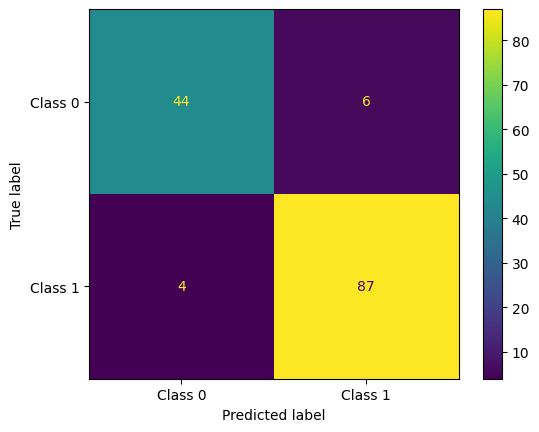

In [33]:
# Performance Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))

print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))

cm = confusion_matrix(y_test, y_pred)

# Create an instance of the ConfusionMatrixDisplay class
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])

# Call the plot() method of the ConfusionMatrixDisplay object to display the confusion matrix
cmd.plot()

# plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

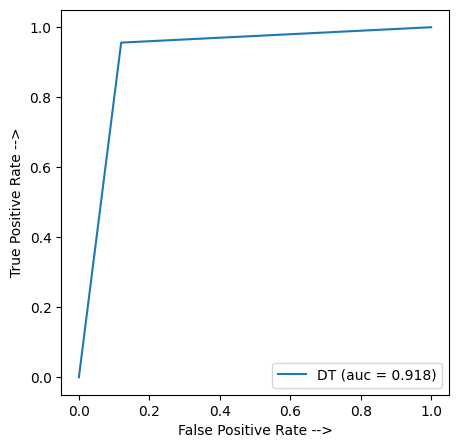

In [34]:

fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='DT (auc = %0.3f)' % auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()


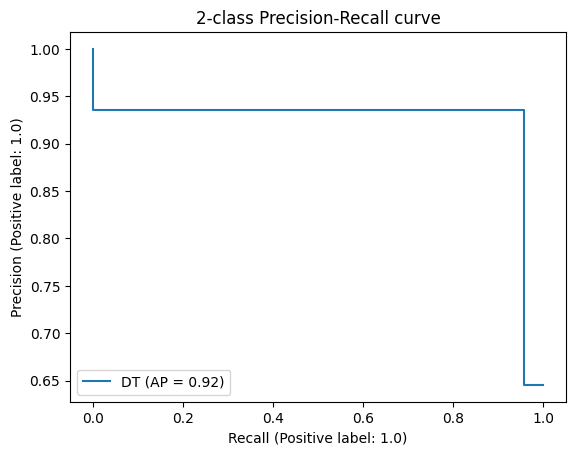

In [35]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="DT"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

[Text(0.4731104651162791, 0.9545454545454546, 'x[4] <= 0.416\ngini = 0.488\nsamples = 562\nvalue = [237, 325]'),
 Text(0.16279069767441862, 0.8636363636363636, 'x[2] <= 0.538\ngini = 0.214\nsamples = 205\nvalue = [180, 25]'),
 Text(0.09302325581395349, 0.7727272727272727, 'x[2] <= 0.366\ngini = 0.497\nsamples = 24\nvalue = [11, 13]'),
 Text(0.046511627906976744, 0.6818181818181818, 'x[1] <= 0.688\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.023255813953488372, 0.5909090909090909, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.06976744186046512, 0.5909090909090909, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.13953488372093023, 0.6818181818181818, 'x[1] <= 0.743\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.11627906976744186, 0.5909090909090909, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.16279069767441862, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23255813953488372, 0.7727272727272727, 'x[1] <= 0.058\ngini = 0.1

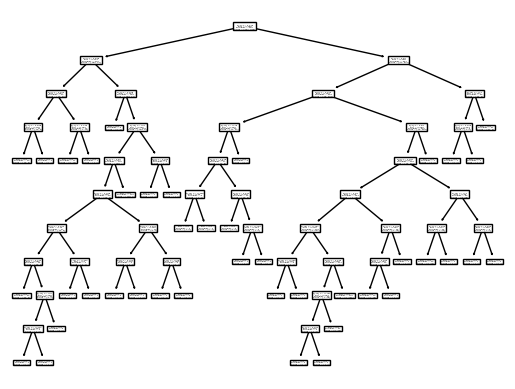

In [36]:
tree.plot_tree(clf)

In [37]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("CCSP") 

In [38]:
'''
# the array must be change into some format to show the names
dot_data = tree.export_graphviz(clf, out_file=None, 
                     #feature_names=X.feature_names,  
                     #class_names=y.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
'''

'\n# the array must be change into some format to show the names\ndot_data = tree.export_graphviz(clf, out_file=None, \n                     #feature_names=X.feature_names,  \n                     #class_names=y.target_names,  \n                     filled=True, rounded=True,  \n                     special_characters=True)  \ngraph = graphviz.Source(dot_data)  \ngraph \n'

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=50)
decision_tree = decision_tree.fit(X_train, y_train)
r = export_text(decision_tree)
print(r)

|--- feature_4 <= 0.42
|   |--- feature_2 <= 0.54
|   |   |--- feature_2 <= 0.37
|   |   |   |--- feature_14 <= 0.84
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_14 >  0.84
|   |   |   |   |--- class: 1.0
|   |   |--- feature_2 >  0.37
|   |   |   |--- feature_9 <= 0.59
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_9 >  0.59
|   |   |   |   |--- class: 1.0
|   |--- feature_2 >  0.54
|   |   |--- feature_1 <= 0.06
|   |   |   |--- class: 1.0
|   |   |--- feature_1 >  0.06
|   |   |   |--- feature_10 <= 0.90
|   |   |   |   |--- feature_1 <= 0.87
|   |   |   |   |   |--- feature_9 <= 0.79
|   |   |   |   |   |   |--- feature_2 <= 0.95
|   |   |   |   |   |   |   |--- feature_6 <= 0.74
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_6 >  0.74
|   |   |   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.85
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |  

In [40]:
# Decision Trees
from sklearn.model_selection import GridSearchCV
param_grid = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, 0.01, 0.001],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
clf = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, scoring=['recall','f1'],refit='f1',verbose=True, error_score='raise')

clf.fit(X_train, y_train)

print("Optimized parameters", clf.best_params_)
print("Accuracy", clf.best_score_)

clf = clf.best_estimator_

y_pred = clf.predict(X_test)

"""               
Warnings:
This warning can occur when using cross-validation techniques, such as GridSearchCV, 
to evaluate the performance of a model. 
The warning indicates that there may be a problem with the model or the data, 
and that the results of the evaluation may not be reliable.
"""

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimized parameters {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_features': 'sqrt'}
Accuracy 0.9426168034863688


'               \nWarnings:\nThis warning can occur when using cross-validation techniques, such as GridSearchCV, \nto evaluate the performance of a model. \nThe warning indicates that there may be a problem with the model or the data, \nand that the results of the evaluation may not be reliable.\n'

Confusion Matrix:
 [[42  8]
 [ 5 86]]
Accuracy: 0.9078014184397163
Recall Score (Macro) 0.8925274725274726
Recall Score (Default) 0.945054945054945
Precision Score (Macro) 0.9042553191489362
Precision Score (Default) 0.9148936170212766
F1 Score (Macro): 0.8978545555865143
F1 Score (Default): 0.9297297297297297
ROC_AUC Score 0.8925274725274724


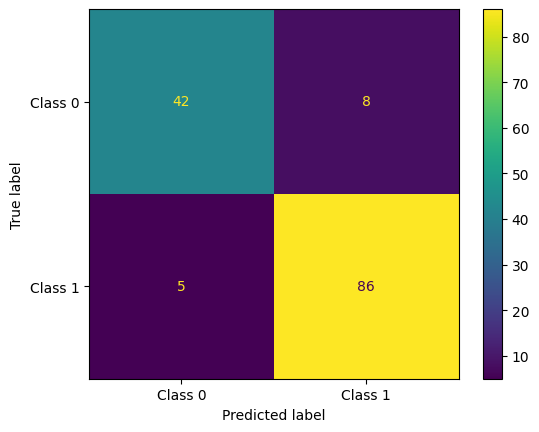

In [41]:
# AFTER GridSearchCV 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))
print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))


cm = confusion_matrix(y_test, y_pred)

# Create an instance of the ConfusionMatrixDisplay class
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])

# Call the plot() method of the ConfusionMatrixDisplay object to display the confusion matrix
cmd.plot()

# plot_confusion_matrix(clf, X_test, y_test)  
plt.show()


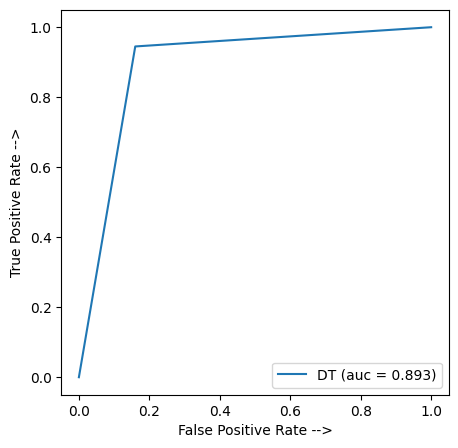

In [42]:
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score

fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='DT (auc = %0.3f)' % auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()


In [43]:
from sklearn.metrics import roc_curve

# Find the index of the point closest to the top-left corner
optimal_index = np.argmax(tpr - fpr)

optimal_threshold = threshold[optimal_index]
print("Optimal Cut Point:", optimal_threshold)

Optimal Cut Point: 1.0


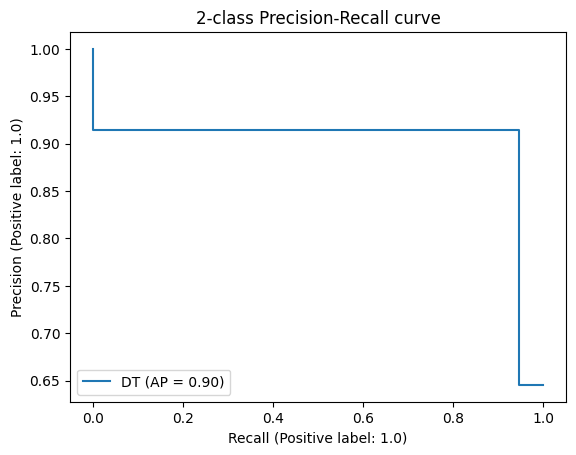

In [44]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="DT"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")